In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('model_yearweek.csv',index_col='YEARWEEK',parse_dates=True)
# df.index.freq='MS'

In [3]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,9365605.46
2018-01-08,9176164.13
2018-01-15,10573484.69
2018-01-22,9145413.08
2018-01-29,9229842.10


In [4]:
df.dtypes

TOTAL_SALES    float64
dtype: object

In [6]:
# columns_to_read = ['YEARWEEK', 'SALES']

# df = pd.read_parquet('/Users/harshitgupta/Desktop/vs /VS-Data-Den/data_cleaning/sales_historic_1.parquet', columns=columns_to_read , parse_dates=['YEARWEEK'])


In [6]:
# df = df.dropna(subset=['TOTAL_SALES'])  
# df = df[df['TOTAL_SALES'] >= 1]         



# df.reset_index(drop=True, inplace=True)

In [7]:
df.dtypes

TOTAL_SALES    float64
dtype: object

In [8]:
df.head(10)

,TOTAL_SALES
0,9365605.46
1,9176164.13
2,10573484.69
3,9145413.08
4,9229842.10
5,10087661.51
6,8972971.81
7,9274372.48
8,11873792.12
9,13721236.15


<Axes: xlabel='YEARWEEK'>

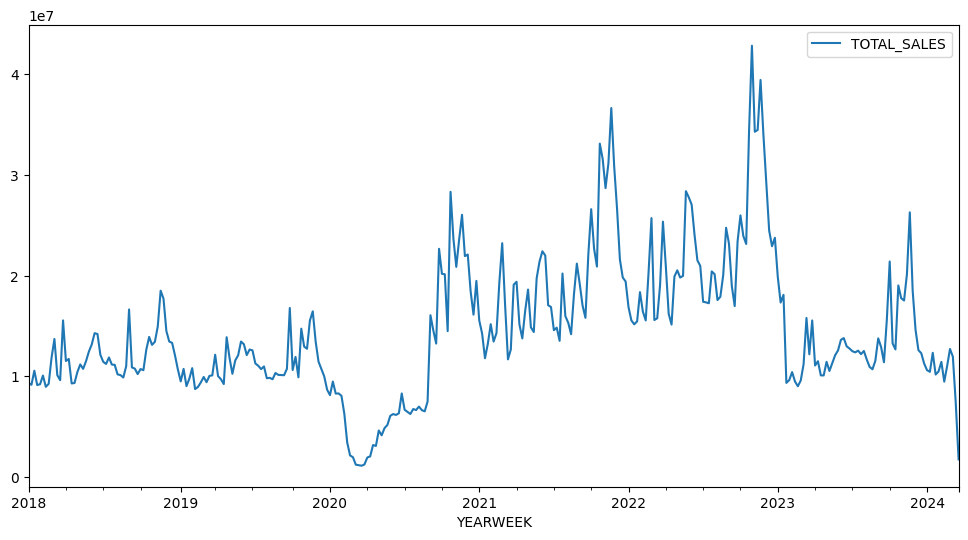

In [5]:
df.plot(figsize=(12,6))

NOT SEEING SEASONALITY

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


In [7]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistic: {:.3f}'.format(result[0]))
    print('p-value: {:.3f}'.format(result[1]))
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t{}: {:.3f}'.format(key, value))


In [8]:
adf_test(df['TOTAL_SALES'])

ADF Statistic: -3.390
p-value: 0.011
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [9]:
df_diff = df['TOTAL_SALES'].diff().dropna()

In [10]:
adf_test(df_diff)

ADF Statistic: -7.440
p-value: 0.000
Critical Values:
	1%: -3.451
	5%: -2.871
	10%: -2.572


In [12]:
df.head()

,TOTAL_SALES
YEARWEEK,
2018-01-01,9365605.46
2018-01-08,9176164.13
2018-01-15,10573484.69
2018-01-22,9145413.08
2018-01-29,9229842.10


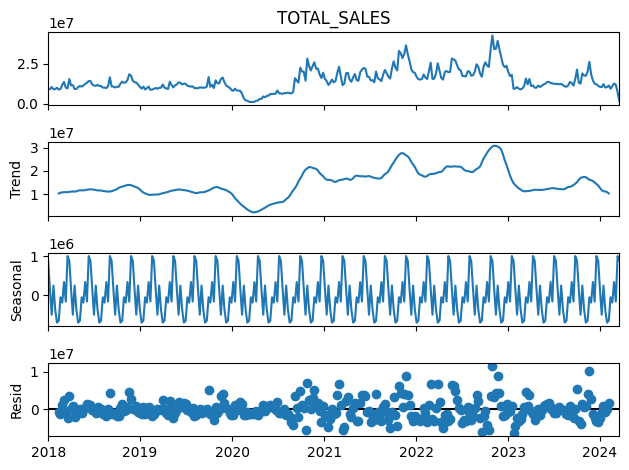

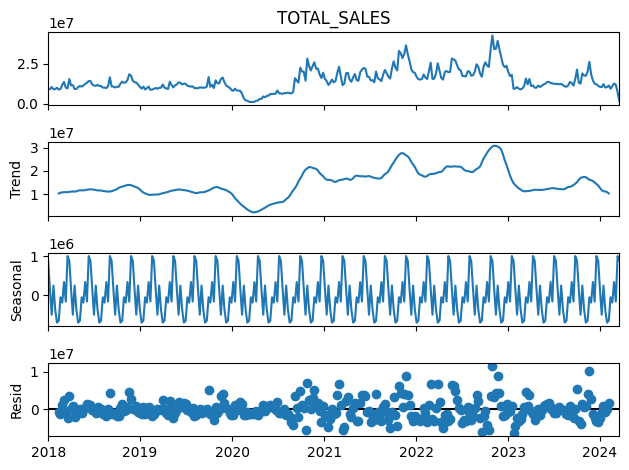

In [13]:
results = seasonal_decompose(df['TOTAL_SALES'], period=12)
results.plot()

In [14]:
len(df)

325

In [15]:
train = df.iloc[:280]
test = df.iloc[280:]

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [17]:
df.head(),df.tail()

(            TOTAL_SALES
 YEARWEEK               
 2018-01-01   9365605.46
 2018-01-08   9176164.13
 2018-01-15  10573484.69
 2018-01-22   9145413.08
 2018-01-29   9229842.10,
             TOTAL_SALES
 YEARWEEK               
 2024-02-19  11024580.24
 2024-02-26  12728328.62
 2024-03-04  11970427.97
 2024-03-11   7420313.89
 2024-03-18   1776069.92)

In [18]:
scaler.fit(train)
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

In [19]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [20]:
n_input = 3


n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [21]:
X,y = generator[0]

print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.19728099 0.19273512 0.22626548]
Predict this y: 
 [[0.19199722]]


In [22]:

X.shape

(1, 3, 1)

In [23]:
n_input = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)
     

In [24]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.losses import Huber
     

In [25]:
# define mode

model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

2024-04-18 15:56:55.599462: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2024-04-18 15:56:55.599484: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2024-04-18 15:56:55.599490: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2024-04-18 15:56:55.599882: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-04-18 15:56:55.599899: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. W

In [26]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:

model.fit(generator,epochs=20)

Epoch 1/20


2024-04-18 15:56:56.274540: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.
/Users/harshitgupta/Desktop/vs /VS-Data-Den/.venv/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - loss: 0.1454
Epoch 2/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 0.0572
Epoch 3/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - loss: 0.0550
Epoch 4/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.0631
Epoch 5/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0558
Epoch 6/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0597
Epoch 7/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0537
Epoch 8/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0538
Epoch 9/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - loss: 0.0564
Epoch 10/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0550
Epoch 11/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0538
Epoch 12/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0556
Epoch 13/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0541
Epoch 14/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0475
Epoch 15/20
277/277 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step 

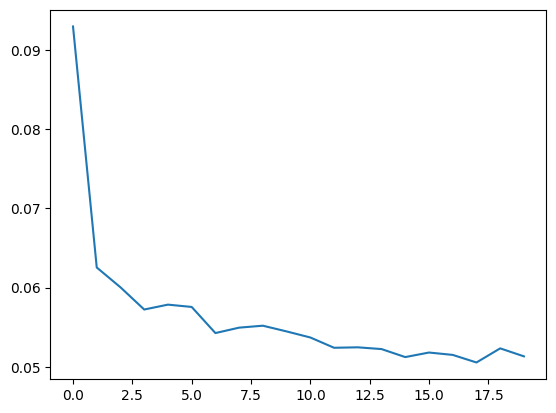

In [28]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [29]:
last_train_batch = scaled_train[-12:]

In [30]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

ValueError: cannot reshape array of size 12 into shape (1,3,1)

In [ ]:
last_train_batch

array([[[0.18921472],
        [0.2027581 ],
        [0.2417776 ],
        [0.35185586],
        [0.26528618],
        [0.34586484],
        [0.23865811],
        [0.24883566],
        [0.21506483],
        [0.21497592],
        [0.24735661],
        [0.22559816]]])

In [ ]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step


array([[0.21655874]], dtype=float32)

In [ ]:
scaled_test[0]

array([0.24440463])

In [31]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test)):
    
    
    current_pred = model.predict(current_batch)[0]
    

    test_predictions.append(current_pred) 
   
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━

In [32]:
test_predictions

[array([0.24841006], dtype=float32),
 array([0.2627874], dtype=float32),
 array([0.27502686], dtype=float32),
 array([0.28673062], dtype=float32),
 array([0.2970733], dtype=float32),
 array([0.3062373], dtype=float32),
 array([0.31443396], dtype=float32),
 array([0.32175946], dtype=float32),
 array([0.32830882], dtype=float32),
 array([0.33417055], dtype=float32),
 array([0.33942056], dtype=float32),
 array([0.34412545], dtype=float32),
 array([0.34834418], dtype=float32),
 array([0.3521289], dtype=float32),
 array([0.3555257], dtype=float32),
 array([0.35857555], dtype=float32),
 array([0.3613149], dtype=float32),
 array([0.36377606], dtype=float32),
 array([0.36598796], dtype=float32),
 array([0.36797634], dtype=float32),
 array([0.36976418], dtype=float32),
 array([0.371372], dtype=float32),
 array([0.37281826], dtype=float32),
 array([0.37411937], dtype=float32),
 array([0.37529007], dtype=float32),
 array([0.37634358], dtype=float32),
 array([0.3772917], dtype=float32),
 array([0.

In [33]:
test.head()

,TOTAL_SALES
YEARWEEK,
2023-05-15,11329402.73
2023-05-22,12115449.20
2023-05-29,12588076.78
2023-06-05,13631629.23
2023-06-12,13809230.57


In [34]:
true_predictions = scaler.inverse_transform(test_predictions)

In [35]:
true_predictions

array([[11496322.1238544 ],
       [12095473.25362063],
       [12605531.69642334],
       [13093265.89184269],
       [13524279.73243599],
       [13906174.01898134],
       [14247755.49630184],
       [14553033.21421966],
       [14825966.54412052],
       [15070244.10991143],
       [15289029.18603386],
       [15485097.55512491],
       [15660905.81586742],
       [15818627.39985646],
       [15960183.62062202],
       [16087280.93245645],
       [16201438.25355445],
       [16304003.11150496],
       [16396180.20839207],
       [16479042.59844329],
       [16553547.83352134],
       [16620551.62469421],
       [16680821.50380519],
       [16735043.0332774 ],
       [16783829.74180109],
       [16827733.06002094],
       [16867244.8044579 ],
       [16902809.59711826],
       [16934823.62353278],
       [16963644.56844395],
       [16989592.85776693],
       [17012967.80408138],
       [17034087.34938064],
       [17053160.14309782],
       [17070382.41505694],
       [17085935.491

In [36]:
test['Predictions'] = true_predictions

/var/folders/_p/ljb0l43112vc95swz8nhgv340000gn/T/ipykernel_48854/4269337381.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions


<Axes: xlabel='YEARWEEK'>

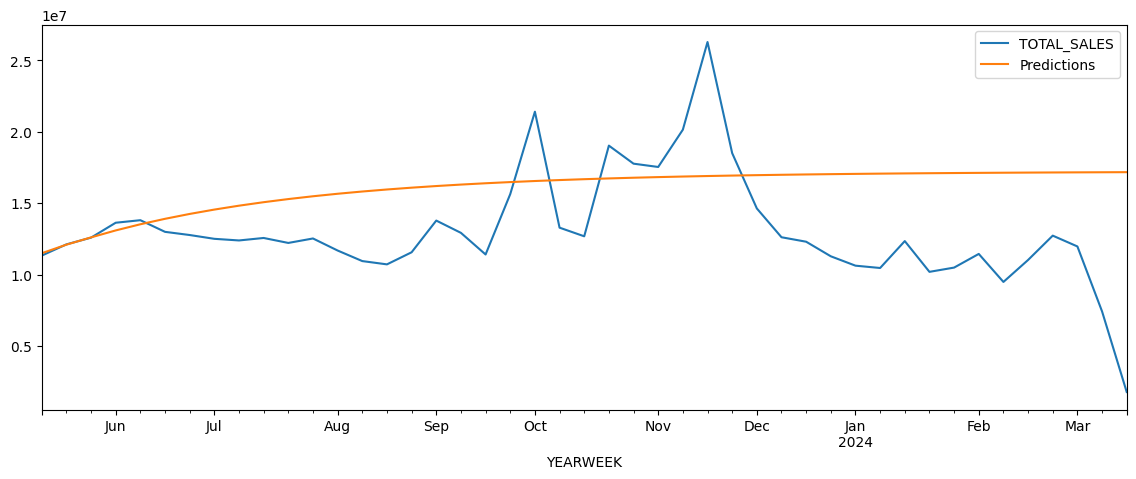

In [37]:
test.plot(figsize=(14,5))

In [38]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(test['TOTAL_SALES'],test['Predictions']))
print(rmse)

4972639.909111099
